<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Energy efficiency - Predict Heating Load and Cooling Load</font></h1>

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Linear Regression Algorithm** to predict: **"heating load and cooling load"** by accuracy evaluation methods.

Please read [Energy efficiency Data Set](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency) carefully before you do this project!

Dataset: ENB2012_data.xlsx

### Attribute Information:
The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

#### Specifically:
- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution
- **y1 Heating Load**
- **y2 Cooling Load**

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

In [1]:
# Import thư viện
# Mảng 1 chiều,2 chiều...
import numpy as np
# Dựa trên numpy phát triển thêm => Dùng series/ DataFrame => 2 Kiểu dự liệu được dùng
import pandas as pd
# Dùng biểu đồ 2D
import matplotlib.pyplot as plt
# Trực quan hóa dữ liệu dựa trên matpotlib
import seaborn as sns
# Nếu dữ liệu warning thì phài dùng thêm thư viện này
# Muốn tắt warning
import warnings
warnings.filterwarnings('ignore')
# thư viện khoảng cách giữa median 25% và median 75%
import scipy
# Dùng để thực hiện phân tích ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
#using chi-squared => Dùng để phân tích 2 biến xem mức độ tương quan của 2 cặp biến thuộc tính
from scipy.stats import chi2_contingency, chi2
# Thư viện muốn biết 2 biến phụ thuộc nhiều hay ít thì chúng ta có thể sử dụng turkey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Turkey HSD)
import datetime as dt
# Thư viện thời gian
import glob
# Thư việt gộm nhiều file/tập tin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
# Thuật toán tuyến tính học LDS3 => Thuật toán LinearRegression/ Thuật toán hồi quy tuyến tính
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# from google.colab import drive
# drive.mount("/content/gdrive", force_remount=True)
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.validation import column_or_1d
# Thuật toán tree Decision

from IPython.display import Image
from sklearn import tree
import pydotplus

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# Đánh giá model => đánh giá dữ liệu cân băng không ?
from imblearn.over_sampling import SMOTE
# Dùng để đánh giả lại tập mẫu
from collections import Counter

from sklearn.preprocessing import LabelEncoder

from sklearn.utils import resample

from sklearn.model_selection import train_test_split
# Chia dữ liệu thành 2 phần, train và test
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict

from ipywidgets import interact, interactive, fixed, interact_manual

import math

from sklearn.utils.validation import column_or_1d

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
# Import Instantiate CountVectorizer
from sklearn.metrics import accuracy_score, average_precision_score

from sklearn.metrics import confusion_matrix, precision_recall_curve

import pandas_profiling as pp # tổng quan ban đầu về dữ liệu => Cài trên này

from scipy import stats

from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Đọc dữ liệu
lst_cols = ['X1_Relative_Compactness', 'X2_Surface_Area', 'X3_Wall_Area', 'X4_Roof_Area',
                        'X5_Overall_Height','X6_Orientation', 'X7_Glazing_Area', 'X8_Glazing_Area_Distribution',
                         'y1_Heating_Load', 'y2_Cooling_Load']

df = pd.read_excel('data\ENB2012_data.xlsx')
df = df[df.columns[:-2]]
df.columns = lst_cols

In [3]:
# Xem info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X1_Relative_Compactness       768 non-null    float64
 1   X2_Surface_Area               768 non-null    float64
 2   X3_Wall_Area                  768 non-null    float64
 3   X4_Roof_Area                  768 non-null    float64
 4   X5_Overall_Height             768 non-null    float64
 5   X6_Orientation                768 non-null    int64  
 6   X7_Glazing_Area               768 non-null    float64
 7   X8_Glazing_Area_Distribution  768 non-null    int64  
 8   y1_Heating_Load               768 non-null    float64
 9   y2_Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
df.head()

X1_Relative_Compactness  X2_Surface_Area  X3_Wall_Area  X4_Roof_Area  \
0                     0.98            514.5         294.0        110.25   
1                     0.98            514.5         294.0        110.25   
2                     0.98            514.5         294.0        110.25   
3                     0.98            514.5         294.0        110.25   
4                     0.90            563.5         318.5        122.50   

   X5_Overall_Height  X6_Orientation  X7_Glazing_Area  \
0                7.0               2              0.0   
1                7.0               3              0.0   
2                7.0               4              0.0   
3                7.0               5              0.0   
4                7.0               2              0.0   

   X8_Glazing_Area_Distribution  y1_Heating_Load  y2_Cooling_Load  
0                             0            15.55            21.33  
1                             0            15.55            21.33  
2                             0            15.55            21.33  
3                             0            15.55            21.33  
4                             0            20.84            28.28

In [5]:
df.tail()

X1_Relative_Compactness  X2_Surface_Area  X3_Wall_Area  X4_Roof_Area  \
763                     0.64            784.0         343.0         220.5   
764                     0.62            808.5         367.5         220.5   
765                     0.62            808.5         367.5         220.5   
766                     0.62            808.5         367.5         220.5   
767                     0.62            808.5         367.5         220.5   

     X5_Overall_Height  X6_Orientation  X7_Glazing_Area  \
763                3.5               5              0.4   
764                3.5               2              0.4   
765                3.5               3              0.4   
766                3.5               4              0.4   
767                3.5               5              0.4   

     X8_Glazing_Area_Distribution  y1_Heating_Load  y2_Cooling_Load  
763                             5            17.88            21.40  
764                             5            16.54            16.88  
765                             5            16.44            17.11  
766                             5            16.48            16.61  
767                             5            16.64            16.03

In [6]:
# Thư viện xem tổng quan về dữ liệu
profile = pp.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Nhận xét:
    1. Có 6 biến là numberic và có 4 biến là categorical
    2. Dữ liệu không có double_rows

In [7]:
# Loại bỏ dòng trùng (nếu có)
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X1_Relative_Compactness       768 non-null    float64
 1   X2_Surface_Area               768 non-null    float64
 2   X3_Wall_Area                  768 non-null    float64
 3   X4_Roof_Area                  768 non-null    float64
 4   X5_Overall_Height             768 non-null    float64
 5   X6_Orientation                768 non-null    int64  
 6   X7_Glazing_Area               768 non-null    float64
 7   X8_Glazing_Area_Distribution  768 non-null    int64  
 8   y1_Heating_Load               768 non-null    float64
 9   y2_Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 66.0 KB


# Loại bỏ những thuộc tính không liên quan đến yêu cầu bài toán

Yêu cầu bài toán là dự đoán Y1, Y2 và Chưa đủ cơ sở loại bỏ thuộc tính nào không liên quan ngay tại bước này

# XỬ LÝ DỮ LIỆU THIẾU (MISSING VALUES)

In [8]:
# Kiểm tra kiểu dữ liệu và missing values
for i in df.columns:
    if len(df[i].unique()) > 50:
        print('\033[4m'+'Kiểm tra biến', i +'\033[0m', ': ', len(df[i].unique()),\
              'giá trị,', '50 giá trị đầu tiên: ', df[i].sort_values().unique()[:50], ', dtype:', df[i].dtypes)
    
    else:
        print('\033[4m'+'Kiểm tra biến', i +'\033[0m', ': ', len(df[i].unique()),\
              'giá trị,', df[i].sort_values().unique(), ', dtype:', df[i].dtypes)
#     print('='*50)

Kiểm tra biến X1_Relative_Compactness :  12 giá trị, [0.62 0.64 0.66 0.69 0.71 0.74 0.76 0.79 0.82 0.86 0.9  0.98] , dtype: float64
Kiểm tra biến X2_Surface_Area :  12 giá trị, [514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5] , dtype: float64
Kiểm tra biến X3_Wall_Area :  7 giá trị, [245.  269.5 294.  318.5 343.  367.5 416.5] , dtype: float64
Kiểm tra biến X4_Roof_Area :  4 giá trị, [110.25 122.5  147.   220.5 ] , dtype: float64
Kiểm tra biến X5_Overall_Height :  2 giá trị, [3.5 7. ] , dtype: float64
Kiểm tra biến X6_Orientation :  4 giá trị, [2 3 4 5] , dtype: int64
Kiểm tra biến X7_Glazing_Area :  4 giá trị, [0.   0.1  0.25 0.4 ] , dtype: float64
Kiểm tra biến X8_Glazing_Area_Distribution :  6 giá trị, [0 1 2 3 4 5] , dtype: int64
Kiểm tra biến y1_Heating_Load :  587 giá trị, 50 giá trị đầu tiên:  [ 6.01   6.04   6.05   6.07   6.366  6.37   6.4    6.77   6.79   6.81
  6.85   7.1    7.18   8.45   8.49   8.5    8.6   10.07  10.08  10.14
 10.15  10.32  10.34  10

#### Nhận xét:
1. Các biến phân loại, đúng kiểu số, không có missing values: 'X1_Relative_Compactness', 'X2_Surface_Area', 'X3_Wall_Area', 'X4_Roof_Area', 'X5_Overall_Height','X6_Orientation', 'X7_Glazing_Area', 'X8_Glazing_Area_Distribution'
2. Các biến liên tục, đúng kiểu số, không có missing values: 'y1_Heating_Load', 'y2_Cooling_Load'

# KHÁM PHÁ DỮ LIỆU (DATA EXPLORATION)

## Xác định các thuộc tính (Variable Identification)

In [9]:
# Xác định inputs/outputs
lst_output = [ 'y1_Heating_Load', 'y2_Cooling_Load']
lst_input = ['X1_Relative_Compactness', 'X2_Surface_Area', 'X3_Wall_Area', 'X4_Roof_Area', 
             'X5_Overall_Height','X6_Orientation', 'X7_Glazing_Area', 'X8_Glazing_Area_Distribution']

#### Nhận xét:
* Biến output: 'y1_Heating_Load', 'y2_Cooling_Load'
* Biến input: 'X1_Relative_Compactness', 'X2_Surface_Area', 'X3_Wall_Area', 'X4_Roof_Area',  'X5_Overall_Height','X6_Orientation', 'X7_Glazing_Area', 'X8_Glazing_Area_Distribution'  

In [10]:
# Xác định kiểu dữ liệu của thuộc tính
df.dtypes

X1_Relative_Compactness         float64
X2_Surface_Area                 float64
X3_Wall_Area                    float64
X4_Roof_Area                    float64
X5_Overall_Height               float64
X6_Orientation                    int64
X7_Glazing_Area                 float64
X8_Glazing_Area_Distribution      int64
y1_Heating_Load                 float64
y2_Cooling_Load                 float64
dtype: object

#### Nhận xét:
* Tất cả các thuộc tính đều kiểu số

In [11]:
# Thuộc tính output kiểu số liên tục
df[lst_output].dtypes

y1_Heating_Load    float64
y2_Cooling_Load    float64
dtype: object

In [12]:
# Xác định thuộc tính phân loại (Categorical field)
t1 = []
t2 = []
lst_phanloai = []

for i in lst_input:    
    if df[i].dtypes =='object':
        lst_phanloai.append(i)
        i = '\'' + i + '\''
        t1.append(i)
    elif len(df[i].unique()) <= 20 and (df[i].dtypes =='int64' or df[i].dtypes =='float'):
        lst_phanloai.append(i)
        i = '\'' + i + '\''
        t2.append(i)   
    else: pass    
print('- Thuộc tính phân loại kiểu chuỗi: ',', '.join(t1))
print('- Thuộc tính phân loại kiểu số: ',', '.join(t2))

- Thuộc tính phân loại kiểu chuỗi:  
- Thuộc tính phân loại kiểu số:  'X1_Relative_Compactness', 'X2_Surface_Area', 'X3_Wall_Area', 'X4_Roof_Area', 'X5_Overall_Height', 'X6_Orientation', 'X7_Glazing_Area', 'X8_Glazing_Area_Distribution'


In [13]:
# Xác định thuộc tính input là liên tục (Continious field)
lst_lientuc = list(set(lst_input) - set(lst_phanloai))

t3 = []
for i in lst_lientuc:
    i = '\'' + i + '\''
    t3.append(i)   
print('- Thuộc tính liên tục:',', '.join(t3))

- Thuộc tính liên tục: 


## Phân tích đơn biến (Univariable Analysis)

### 1. Phân tích biến liên tục (Continious field)

In [14]:
# Các chỉ số mô tả thuộc tính output và input liên tục
print(df.describe())
for i in range(len(lst_output+lst_phanloai)):
    print("\nGiá trị thống kê của", (df.columns)[i],":\n",stats.describe(df[(df.columns)[i]]))

#--> Tuy các biến inputs là biến phân loại, nhưng có kiểu số nên vẫn đưa vào phân tích

       X1_Relative_Compactness  X2_Surface_Area  X3_Wall_Area  X4_Roof_Area  \
count               768.000000       768.000000    768.000000    768.000000   
mean                  0.764167       671.708333    318.500000    176.604167   
std                   0.105777        88.086116     43.626481     45.165950   
min                   0.620000       514.500000    245.000000    110.250000   
25%                   0.682500       606.375000    294.000000    140.875000   
50%                   0.750000       673.750000    318.500000    183.750000   
75%                   0.830000       741.125000    343.000000    220.500000   
max                   0.980000       808.500000    416.500000    220.500000   

       X5_Overall_Height  X6_Orientation  X7_Glazing_Area  \
count          768.00000      768.000000       768.000000   
mean             5.25000        3.500000         0.234375   
std              1.75114        1.118763         0.133221   
min              3.50000        2.000000    

In [15]:
# Độ đối xứng
lst_trai = []
lst_phai = []
lst_doixung = []
for i in (lst_output):
    if df[i].skew() > 0:
        lst_phai.append(i)
    elif df[i].skew() < 0:
        lst_trai.append(i)
    elif df[i].skew() == 0:
        lst_doixung.append(i)
print('Thuộc tính lệch phải:',lst_phai)
print('Thuộc tính lệch trái:',lst_trai)
print('Thuộc tính đối xứng:',lst_doixung)

Thuộc tính lệch phải: ['y1_Heating_Load', 'y2_Cooling_Load']
Thuộc tính lệch trái: []
Thuộc tính đối xứng: []


In [16]:
# Độ nhọn
lst_nhon = []
lst_bet = []
lst_chuan = []
for i in (lst_output):
    if df[i].kurtosis() > 0:
        lst_nhon.append(i)
    elif df[i].kurtosis() < 0:
        lst_bet.append(i)
    elif df[i].kurtosis() == 0:
        lst_chuan.append(i)
print('Thuộc tính nhọn hơn PP chuẩn :',lst_nhon)
print('Thuộc tính bẹt hơn PP chuẩn:',lst_bet)
print('Thuộc tính tương đương PP chuẩn:',lst_chuan)

Thuộc tính nhọn hơn PP chuẩn : []
Thuộc tính bẹt hơn PP chuẩn: ['y1_Heating_Load', 'y2_Cooling_Load']
Thuộc tính tương đương PP chuẩn: []


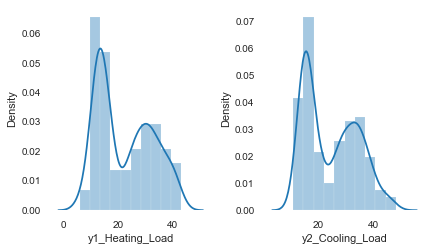

In [17]:
# Biểu đồ histogram
plt.figure(figsize=(15,10))
n=0
for i in lst_output:
    n=n+1
    plt.subplot(3,5,n)
    sns.distplot(df[i])
plt.tight_layout()
plt.show()

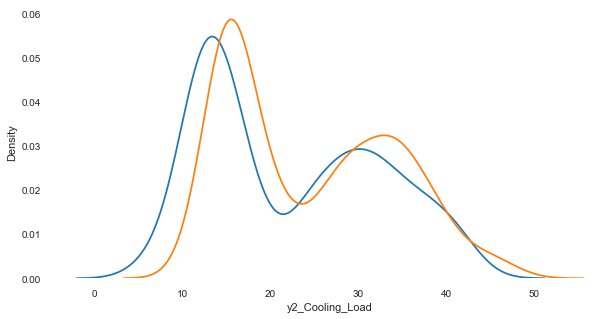

In [18]:
# Biểu đồ histogram chồng
f, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(10,5))
for i in (lst_output):
    sns.distplot(df[i], ax= ax1, hist=False)
plt.show()

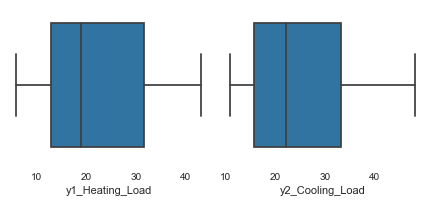

In [19]:
# Biểu đồ boxplot
plt.figure(figsize=(15,8))
n=0
for i in (lst_output):
    n=n+1
    plt.subplot(3,5,n)
    sns.boxplot(df[i])
plt.tight_layout()
plt.show()

#### Nhận xét:
* 2 biến outputs đều KHÔNG CÓ potential outliers

### 2. Phân tích biến phân loại (Categorical field)

In [20]:
# Các chỉ số mô tả thuộc tính
for i in lst_phanloai:
    value_counts = df[i].value_counts()
    print('-', '\033[4m'+'Mô tả biến ', i+'\033[0m', ':',len(df[i].unique()),'giá trị')
    print(value_counts)

- Mô tả biến  X1_Relative_Compactness : 12 giá trị
0.82    64
0.71    64
0.62    64
0.86    64
0.64    64
0.69    64
0.66    64
0.90    64
0.98    64
0.79    64
0.74    64
0.76    64
Name: X1_Relative_Compactness, dtype: int64
- Mô tả biến  X2_Surface_Area : 12 giá trị
661.5    64
784.0    64
588.0    64
735.0    64
808.5    64
637.0    64
612.5    64
710.5    64
514.5    64
759.5    64
563.5    64
686.0    64
Name: X2_Surface_Area, dtype: int64
- Mô tả biến  X3_Wall_Area : 7 giá trị
318.5    192
294.0    192
343.0    128
416.5     64
269.5     64
367.5     64
245.0     64
Name: X3_Wall_Area, dtype: int64
- Mô tả biến  X4_Roof_Area : 4 giá trị
220.50    384
147.00    192
122.50    128
110.25     64
Name: X4_Roof_Area, dtype: int64
- Mô tả biến  X5_Overall_Height : 2 giá trị
3.5    384
7.0    384
Name: X5_Overall_Height, dtype: int64
- Mô tả biến  X6_Orientation : 4 giá trị
2    192
3    192
4    192
5    192
Name: X6_Orientation, dtype: int64
- Mô tả biến  X7_Glazing_Area : 4 giá trị
0

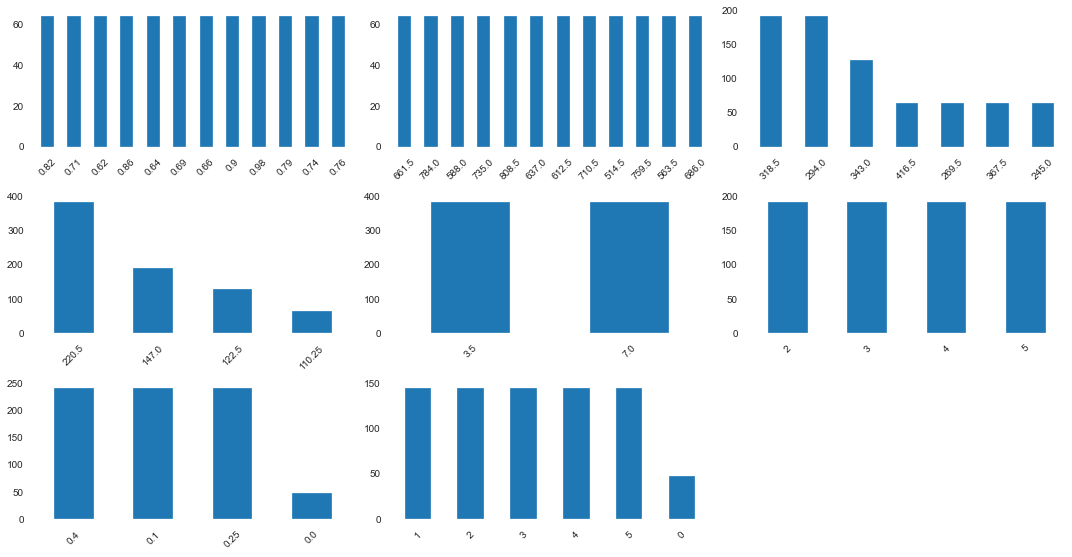

In [21]:
# Biểu đồ barchart
plt.figure(figsize=(15,10))
n=0
for i in lst_phanloai:
    n=n+1
    plt.subplot(4,3,n)
    df[i].value_counts().plot.bar()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
#     sns.barplot(df[i].value_counts().reset_index(), x='index', y=i)

## Phân tích hai biến (Bi-variable Analysis)

### 1. Biến liên tục và Biến liên tục (Continious & Continious)

In [22]:
# Ma trận hệ số tương quan
df[lst_output].corr()

y1_Heating_Load  y2_Cooling_Load
y1_Heating_Load         1.000000         0.975862
y2_Cooling_Load         0.975862         1.000000

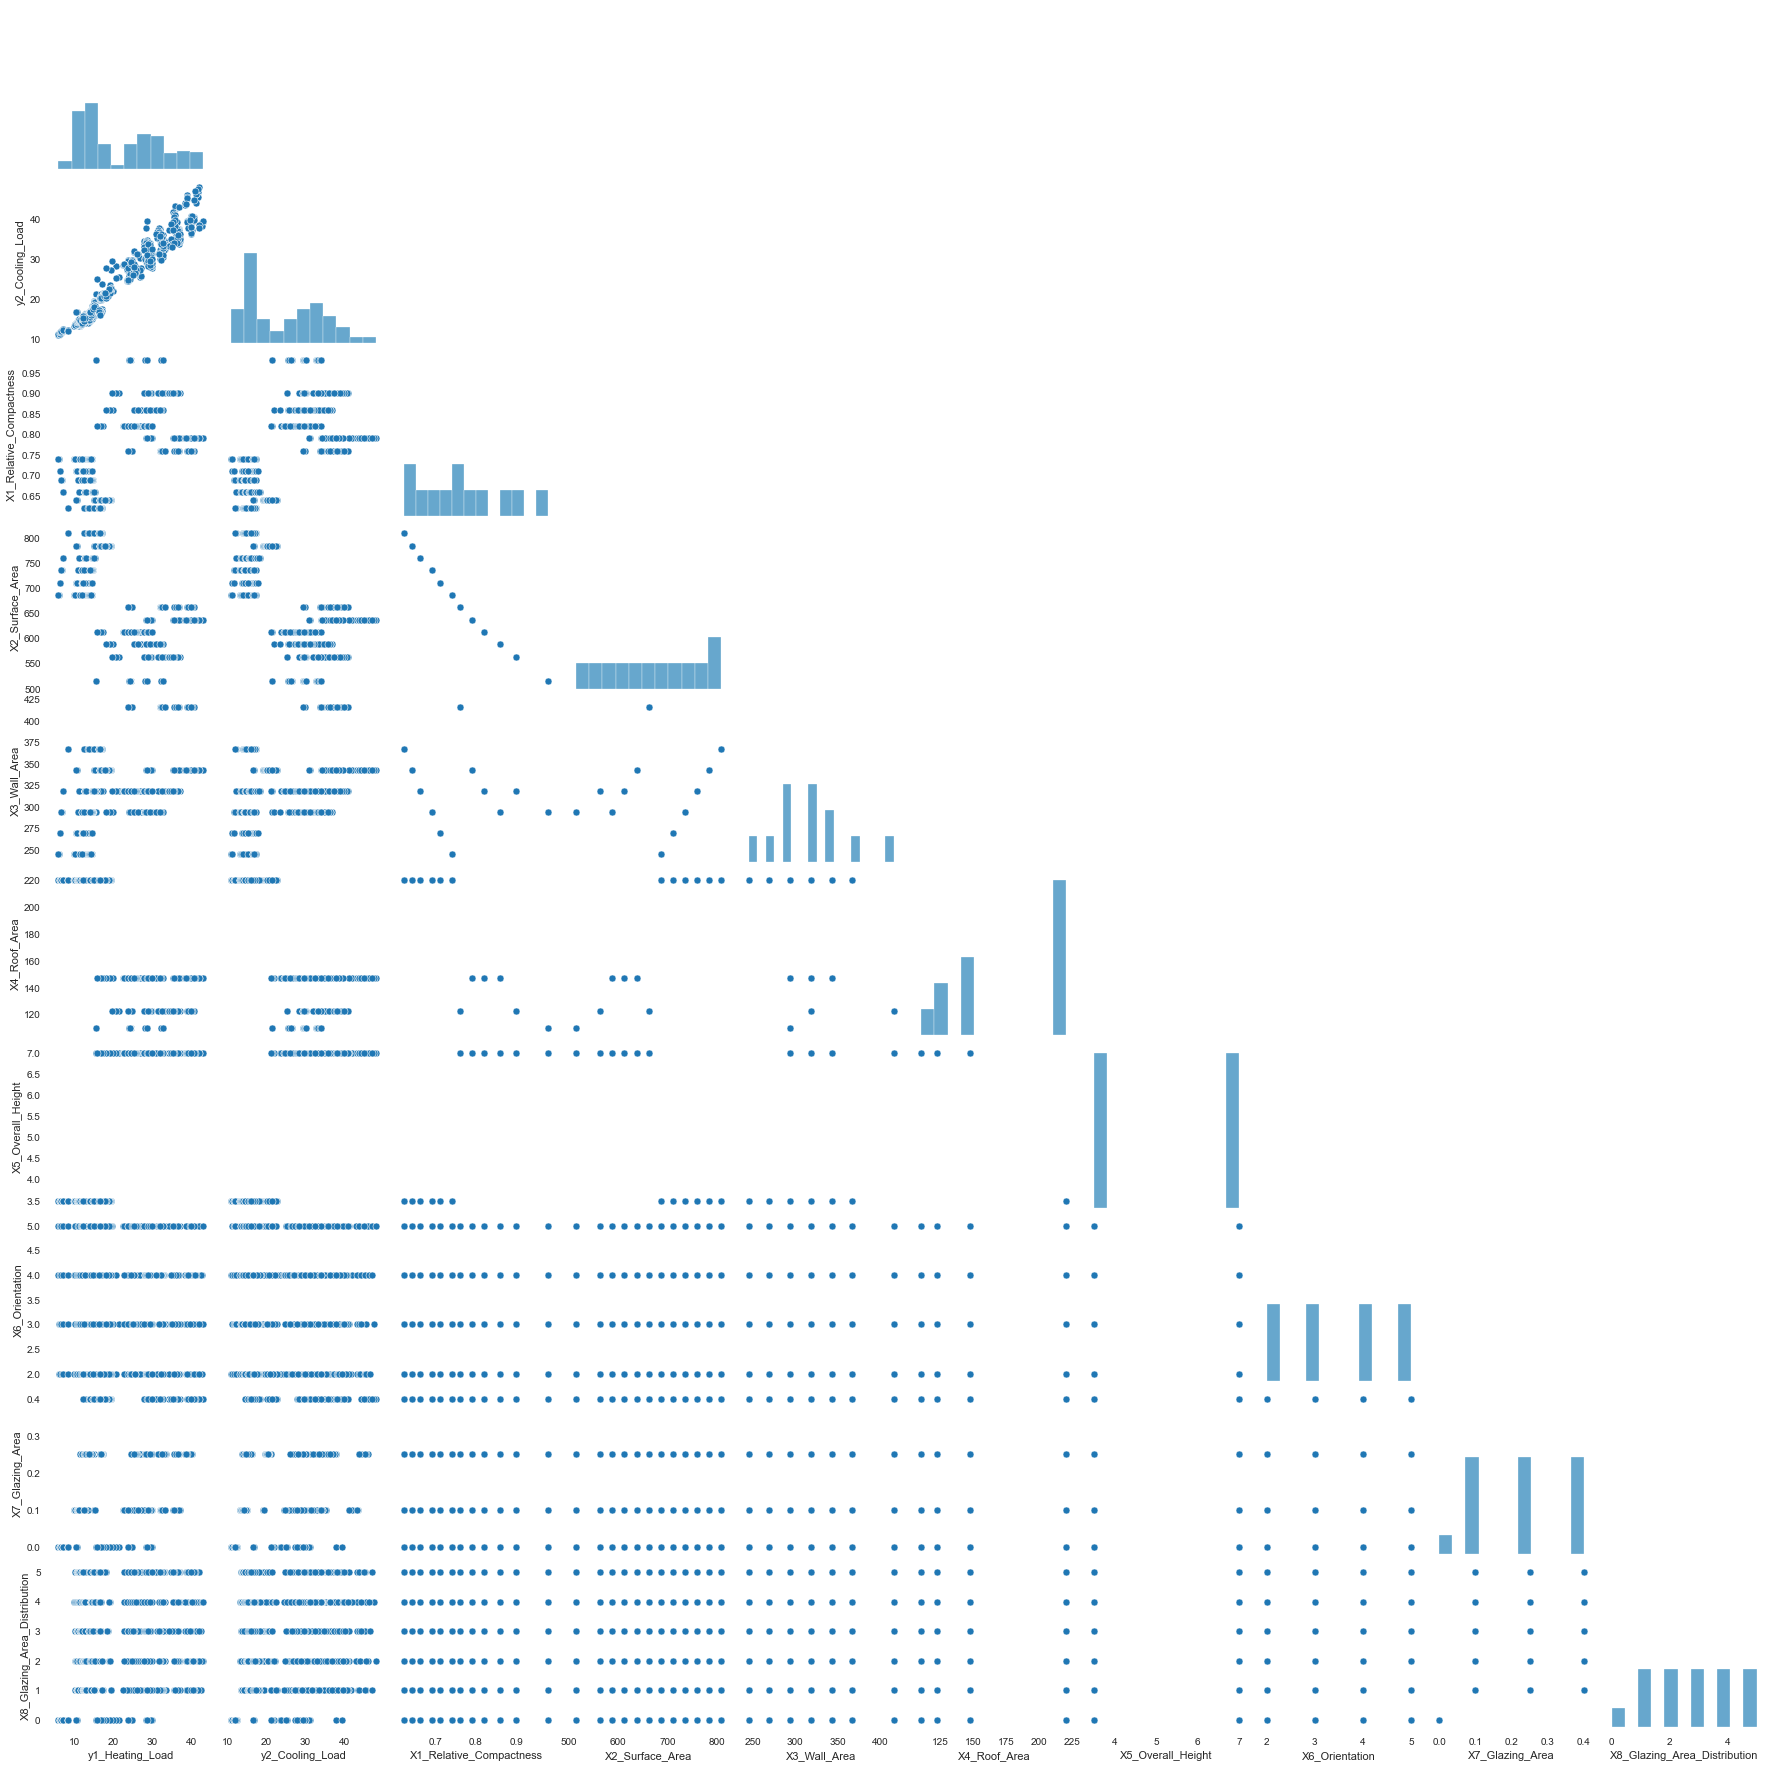

In [23]:
# Biểu đồ tương quan
sns.pairplot(df[lst_output+lst_phanloai], corner = True)

#--> Tuy các biến inputs là biến phân loại, nhưng có kiểu số nên vẫn đưa vào để quan sát

### 2. Biến liên tục và Biến phân loại (Continious & Categorical)

In [24]:
#2.1. Giữa biến output và biến inputs
#### Tạo chuỗi
prob = 0.95
alpha = 1.0 - prob
string = []
for i in lst_phanloai:
    t = 'C(' + i + ')'
    string.append(t)
string = '+'.join(string)

#### ANOVA và chọn biến outputs phân loại có ảnh hướng đến biến input
for i in lst_output:

    print('Kiểm định ANONA giữa thuộc tính', i, 'và các thuộc tính phân loại:')
    model = ols(i + ' ~ ' + string, data=df).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    print('='*65)
    print(aov_table)
    print('\n')

    print('Các thuộc tính có ảnh hướng đáng kể dến thuộc tính', i, ':')
    print('='*57)
    aov_table1 = aov_table[aov_table['PR(>F)'] < alpha]
    print(aov_table1)
    print('\n')
    lst = aov_table1.index.str.extract('(C\()(\w+)')[1].to_list()
    print('- Kết luận: Các thuộc tính phân loại có ảnh hướng đáng kể dến thuộc tính', i, ':', lst)

Kiểm định ANONA giữa thuộc tính y1_Heating_Load và các thuộc tính phân loại:
                                     sum_sq     df         F    PR(>F)
C(X1_Relative_Compactness)       116.145587   11.0  9.848872  0.001766
C(X2_Surface_Area)               116.145587   11.0  9.848872  0.001766
C(X3_Wall_Area)                   63.352138    6.0  9.848872  0.001766
C(X4_Roof_Area)                   31.676069    3.0  9.848872  0.001766
C(X5_Overall_Height)              10.558690    1.0  9.848872  0.001766
C(X6_Orientation)                  1.622501    3.0  0.504476  0.679295
C(X7_Glazing_Area)                31.676069    3.0  9.848872  0.001766
C(X8_Glazing_Area_Distribution)   52.793449    5.0  9.848872  0.001766
Residual                         799.764968  746.0       NaN       NaN


Các thuộc tính có ảnh hướng đáng kể dến thuộc tính y1_Heating_Load :
                                     sum_sq    df         F    PR(>F)
C(X1_Relative_Compactness)       116.145587  11.0  9.848872  0.001766
C(

c:\users\disne\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\users\disne\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\users\disne\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\users\disne\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have ful

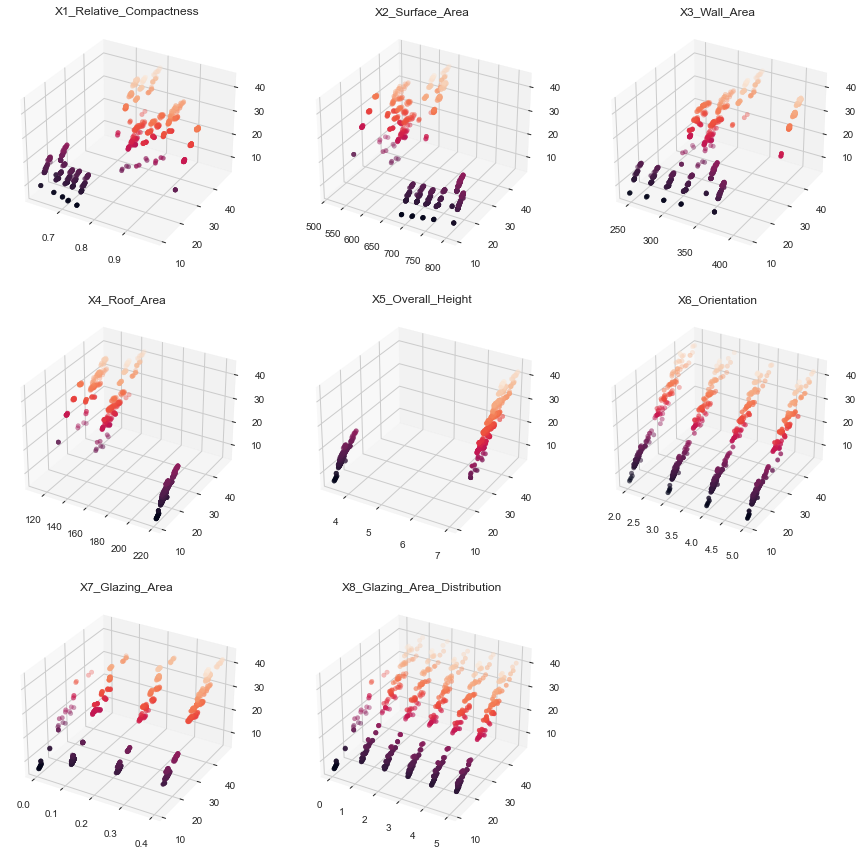

In [25]:
# Biểu đồ scatter 3 chiều
f = plt.figure(figsize=(15,15))
n=0
for i in lst_phanloai:
    n = n+1
    ax = f.add_subplot((330+n), projection='3d')
    ax.scatter(df[i], df['y2_Cooling_Load'], df['y1_Heating_Load'], c=df['y1_Heating_Load'])
    plt.title(i)

plt.show()

In [26]:
# Chọn biến inputs
lst_phanloai_chosen = ['X1_Relative_Compactness', 'X2_Surface_Area', 'X3_Wall_Area', 'X4_Roof_Area', 
                        'X5_Overall_Height', 'X6_Orientation', 'X7_Glazing_Area', 'X8_Glazing_Area_Distribution']
lst_phanloai_chosen1 = ['X1_Relative_Compactness', 'X2_Surface_Area', 'X3_Wall_Area', 'X4_Roof_Area', 
                        'X5_Overall_Height', 'X7_Glazing_Area', 'X8_Glazing_Area_Distribution']
lst_phanloai_chosen2 = ['X1_Relative_Compactness', 'X2_Surface_Area', 'X3_Wall_Area', 'X4_Roof_Area', 
                        'X5_Overall_Height', 'X6_Orientation', 'X7_Glazing_Area', 'X8_Glazing_Area_Distribution']

### 3. Biến phân loại và Biến phân loại (Categorical & Categorical)

In [27]:
# Kiểm tra mức độ phụ thuộc
prob = 0.95
alpha = 1.0 - prob

pair1 = []
pair2 = []

for i in lst_phanloai:
    for j in lst_phanloai[lst_phanloai.index(i)+1:]:
        crosstab = pd.crosstab(df[i], df[j])
        stat, p, dof, expected = chi2_contingency(crosstab)
#         critical = chi2.ppf(prob, dof)

        if p <= alpha:
            pair1.append([i,j])
        else:
            pair2.append([i,j])
    
print('- Phụ thuộc nhau (reject H0):',pair1)
print('\n')
print('- Độc lập nhau (fail to reject H0):',pair2)

- Phụ thuộc nhau (reject H0): [['X1_Relative_Compactness', 'X2_Surface_Area'], ['X1_Relative_Compactness', 'X3_Wall_Area'], ['X1_Relative_Compactness', 'X4_Roof_Area'], ['X1_Relative_Compactness', 'X5_Overall_Height'], ['X2_Surface_Area', 'X3_Wall_Area'], ['X2_Surface_Area', 'X4_Roof_Area'], ['X2_Surface_Area', 'X5_Overall_Height'], ['X3_Wall_Area', 'X4_Roof_Area'], ['X3_Wall_Area', 'X5_Overall_Height'], ['X4_Roof_Area', 'X5_Overall_Height'], ['X7_Glazing_Area', 'X8_Glazing_Area_Distribution']]


- Độc lập nhau (fail to reject H0): [['X1_Relative_Compactness', 'X6_Orientation'], ['X1_Relative_Compactness', 'X7_Glazing_Area'], ['X1_Relative_Compactness', 'X8_Glazing_Area_Distribution'], ['X2_Surface_Area', 'X6_Orientation'], ['X2_Surface_Area', 'X7_Glazing_Area'], ['X2_Surface_Area', 'X8_Glazing_Area_Distribution'], ['X3_Wall_Area', 'X6_Orientation'], ['X3_Wall_Area', 'X7_Glazing_Area'], ['X3_Wall_Area', 'X8_Glazing_Area_Distribution'], ['X4_Roof_Area', 'X6_Orientation'], ['X4_Roof_Area

# LÀM SẠCH DỮ LIỆU (DATA CLEANING)

### Kết hợp dữ liệu (Combining Data)

In [28]:
# Tạo DataFrame chỉ gồm Biến output, Biến intputs được chọn
df = pd.concat([df[lst_phanloai_chosen],pd.DataFrame(df[lst_output])], axis = 1)
df1 = pd.concat([df[lst_phanloai_chosen1],pd.DataFrame(df[lst_output[0]])], axis = 1)
df2 = pd.concat([df[lst_phanloai_chosen2],pd.DataFrame(df[lst_output[1]])], axis = 1)

### Làm sạch dữ liệu (Cleaning Data)

In [29]:
# Xử lý dữ liệu trùng (Duplicate Values)
#--> Do df1, df2 chỉ chọn 1 số Biến so với dữ liệu ban đầu, nên có khả năng sẽ có dòng dữ liệu bị trùng
df1 = df1.drop_duplicates().reset_index()
df2 = df2.drop_duplicates().reset_index()

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         736 non-null    int64  
 1   X1_Relative_Compactness       736 non-null    float64
 2   X2_Surface_Area               736 non-null    float64
 3   X3_Wall_Area                  736 non-null    float64
 4   X4_Roof_Area                  736 non-null    float64
 5   X5_Overall_Height             736 non-null    float64
 6   X7_Glazing_Area               736 non-null    float64
 7   X8_Glazing_Area_Distribution  736 non-null    int64  
 8   y1_Heating_Load               736 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 51.9 KB


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         768 non-null    int64  
 1   X1_Relative_Compactness       768 non-null    float64
 2   X2_Surface_Area               768 non-null    float64
 3   X3_Wall_Area                  768 non-null    float64
 4   X4_Roof_Area                  768 non-null    float64
 5   X5_Overall_Height             768 non-null    float64
 6   X6_Orientation                768 non-null    int64  
 7   X7_Glazing_Area               768 non-null    float64
 8   X8_Glazing_Area_Distribution  768 non-null    int64  
 9   y2_Cooling_Load               768 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 60.1 KB


# DỰ ĐOÁN (2 output cùng lúc)

## CHUẨN HOÁ DỮ LIỆU (DATA STANDARDIZING)

In [32]:
# Xem lại các chỉ số mô tả thuộc tính input phân loại
print(df[lst_phanloai_chosen].describe())
for i in range(len(lst_input)):
    print("\nGiá trị thống kê của", lst_phanloai_chosen[i],":\n",stats.describe(df[lst_phanloai_chosen[i]]))

       X1_Relative_Compactness  X2_Surface_Area  X3_Wall_Area  X4_Roof_Area  \
count               768.000000       768.000000    768.000000    768.000000   
mean                  0.764167       671.708333    318.500000    176.604167   
std                   0.105777        88.086116     43.626481     45.165950   
min                   0.620000       514.500000    245.000000    110.250000   
25%                   0.682500       606.375000    294.000000    140.875000   
50%                   0.750000       673.750000    318.500000    183.750000   
75%                   0.830000       741.125000    343.000000    220.500000   
max                   0.980000       808.500000    416.500000    220.500000   

       X5_Overall_Height  X6_Orientation  X7_Glazing_Area  \
count          768.00000      768.000000       768.000000   
mean             5.25000        3.500000         0.234375   
std              1.75114        1.118763         0.133221   
min              3.50000        2.000000    

### Nhận xét:
* Các biến ' X2_Surface_Area', 'X3_Wall_Area', 'X4_Roof_Area' có phương sai lớn so với các biến còn lại

### Chuẩn hoá bằng Log Normalization

In [33]:
lst_phanloai_chosen_log = ['X1_Relative_Compactness', 'X5_Overall_Height', 'X6_Orientation', 
                 'X7_Glazing_Area', 'X8_Glazing_Area_Distribution']
for i in lst_phanloai_chosen:
    if i in lst_phanloai_chosen_log: pass
    else:
        name_log = i + '_log'
        lst_phanloai_chosen_log.append(name_log)
        df[name_log] = np.log(df[i])
    
df[lst_phanloai_chosen_log].head()

# df['X2_log'] = np.log(df['X2'])
# df['X3_log'] = np.log(df['X3'])
# df['X4_log'] = np.log(df['X4'])

X1_Relative_Compactness  X5_Overall_Height  X6_Orientation  \
0                     0.98                7.0               2   
1                     0.98                7.0               3   
2                     0.98                7.0               4   
3                     0.98                7.0               5   
4                     0.90                7.0               2   

   X7_Glazing_Area  X8_Glazing_Area_Distribution  X2_Surface_Area_log  \
0              0.0                             0             6.243196   
1              0.0                             0             6.243196   
2              0.0                             0             6.243196   
3              0.0                             0             6.243196   
4              0.0                             0             6.334167   

   X3_Wall_Area_log  X4_Roof_Area_log  
0          5.683580          4.702751  
1          5.683580          4.702751  
2          5.683580          4.702751  
3          5.683580          4.702751  
4          5.763622          4.808111

## FEATURE ENGINEEING

In [34]:
# Xem lại các thuộc tính phân loại
for i in lst_phanloai_chosen_log:
    print(i,df[i].sort_values().unique())

X1_Relative_Compactness [0.62 0.64 0.66 0.69 0.71 0.74 0.76 0.79 0.82 0.86 0.9  0.98]
X5_Overall_Height [3.5 7. ]
X6_Orientation [2 3 4 5]
X7_Glazing_Area [0.   0.1  0.25 0.4 ]
X8_Glazing_Area_Distribution [0 1 2 3 4 5]
X2_Surface_Area_log [6.24319556 6.33416733 6.37672695 6.41754894 6.45676966 6.49450998
 6.53087763 6.56596895 6.5998705  6.63266032 6.66440902 6.69518068]
X3_Wall_Area_log [5.50125821 5.59656839 5.68357977 5.76362248 5.83773045 5.90672332
 6.03188646]
X4_Roof_Area_log [4.70275051 4.80811103 4.99043259 5.39589769]


#### Nhận xét:
1. Các thuộc tính phân loại được chọn đều là kiểu số
2. Không cần thực hiện Feature Engineering

## CHIA DỮ LIỆU (DATA SPLITTING)

In [35]:
X = df[lst_phanloai_chosen_log]
X.head()

X1_Relative_Compactness  X5_Overall_Height  X6_Orientation  \
0                     0.98                7.0               2   
1                     0.98                7.0               3   
2                     0.98                7.0               4   
3                     0.98                7.0               5   
4                     0.90                7.0               2   

   X7_Glazing_Area  X8_Glazing_Area_Distribution  X2_Surface_Area_log  \
0              0.0                             0             6.243196   
1              0.0                             0             6.243196   
2              0.0                             0             6.243196   
3              0.0                             0             6.243196   
4              0.0                             0             6.334167   

   X3_Wall_Area_log  X4_Roof_Area_log  
0          5.683580          4.702751  
1          5.683580          4.702751  
2          5.683580          4.702751  
3          5.683580          4.702751  
4          5.763622          4.808111

In [36]:
y = df[lst_output]
y[0:5]

y1_Heating_Load  y2_Cooling_Load
0            15.55            21.33
1            15.55            21.33
2            15.55            21.33
3            15.55            21.33
4            20.84            28.28

In [37]:
# Chia dữ liệu thành Training set và Test set

In [38]:
## import thư viện
from sklearn.model_selection import train_test_split

In [39]:
## Chia dữ liệu (Data splitting)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,
                                                   test_size=0.2)

In [40]:
X.shape, X_train.shape, X_test.shape

((768, 8), (614, 8), (154, 8))

In [41]:
y.shape, y_train.shape, y_test.shape

((768, 2), (614, 2), (154, 2))

## MULTIPL LINEAR REGRESSION (MR)

In [42]:
# khởi tạo model
model = LinearRegression()

In [43]:
# huấn luyện model với dữ liệu train
model.fit(X_train, y_train)

LinearRegression()

In [44]:
yhat_train = model.predict(X_train)
yhat_train[0:5,:]

array([[14.72282651, 17.21065373],
       [34.01645451, 35.58046216],
       [27.77396022, 30.15685063],
       [27.53671366, 30.82206117],
       [13.49796874, 16.22994646]])

In [45]:
yhat_test = model.predict(X_test)
yhat_train[0:5,:]

array([[14.72282651, 17.21065373],
       [34.01645451, 35.58046216],
       [27.77396022, 30.15685063],
       [27.53671366, 30.82206117],
       [13.49796874, 16.22994646]])

In [46]:
# tính R^2
print('Full Dataset R-square: ', model.score(X, y))
print('Train Dataset R-square: ', model.score(X_train, y_train))
print('Test Dataset R-square: ', model.score(X_test, y_test))

Full Dataset R-square:  0.903084716712135
Train Dataset R-square:  0.9047098211251219
Test Dataset R-square:  0.8969997483684983


In [47]:
# tính MSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [48]:
print('Train Dataset MSE: ', mean_squared_error(y_true=y_train, y_pred=yhat_train))
print('Test Dataset MSE: ', mean_squared_error(y_true=y_test, y_pred=yhat_test))

Train Dataset MSE:  8.915085780430147
Test Dataset MSE:  10.42830649362271


In [49]:
print('Train Dataset MAE: ', mean_absolute_error(y_true=y_train, y_pred=yhat_train))
print('Test Dataset MAE: ', mean_absolute_error(y_true=y_test, y_pred=yhat_test))

Train Dataset MAE:  2.1307916231253965
Test Dataset MAE:  2.2891239427876737


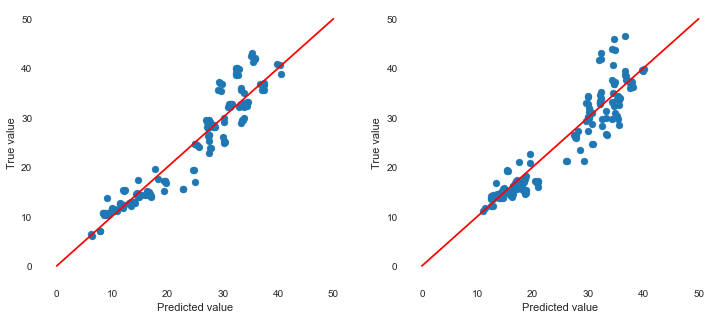

In [50]:
# So sánh Predicted value và True value
plt.figure(figsize=(12,5))
n=0
for i in lst_output:
    n=n+1
    plt.subplot(1,2,n)
    plt.scatter(yhat_test[:,n-1], y_test[i])
    plt.xlabel('Predicted value')
    plt.ylabel('True value')
    plt.plot([0,50], [0,50], 'k-', color='r')

plt.show()

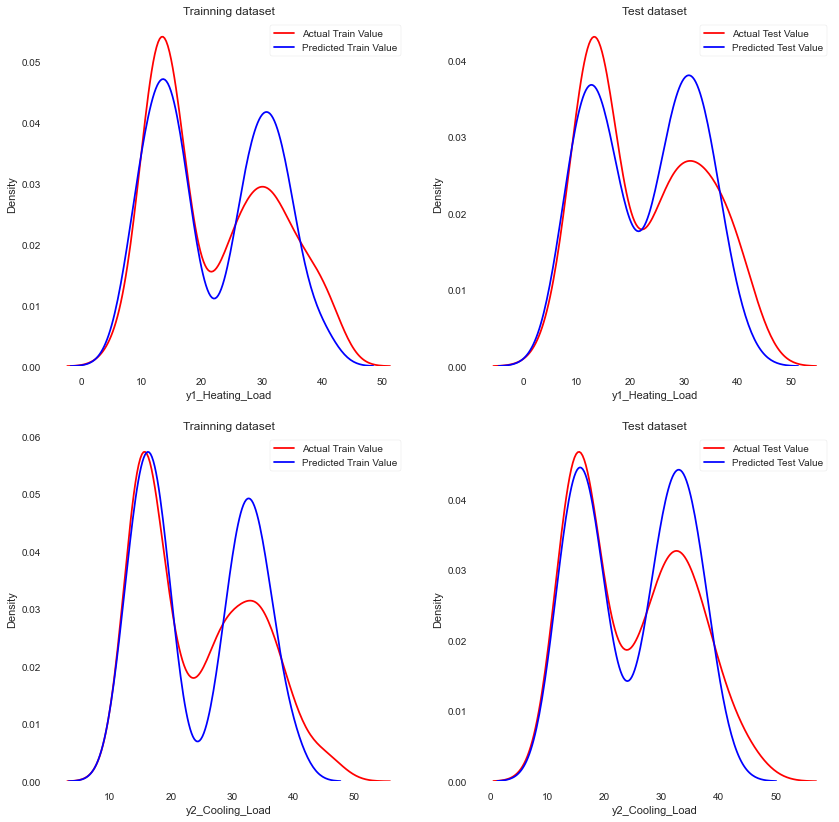

In [51]:
# So sánh biểu đồ phân phối tần suất
plt.figure(figsize=(14,14))
n=0
for i in lst_output:
    n=n+1
    m=lst_output.index(i)
    plt.subplot(2,2,n)
    sns.kdeplot(y_train[i], color='r', label='Actual Train Value')
    sns.kdeplot(yhat_train[:,m],  color='b', label='Predicted Train Value')
    plt.legend()
    plt.title('Trainning dataset')
    n=n+1
    plt.subplot(2,2,n)
    sns.kdeplot(y_test[i],  color='r', label='Actual Test Value')
    sns.kdeplot(yhat_test[:,m],  color='b', label='Predicted Test Value')
    plt.title('Test dataset')
    plt.legend()

plt.show()

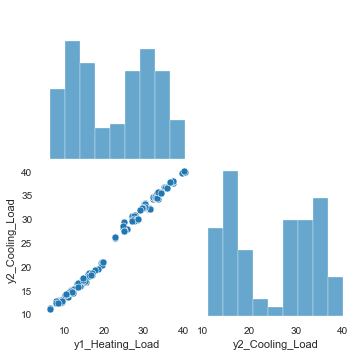

In [52]:
df_yhat_test = pd.DataFrame(yhat_test, columns=df[lst_output].columns)
sns.pairplot(df_yhat_test, corner=True)

## MULTIPLE POLINORMINAL REGRESSION (MPL)

In [53]:
# tạo đa thức bậc 2
pf = PolynomialFeatures(degree=2)

In [54]:
X_pf = pf.fit_transform(X)

In [55]:
X.shape, X_pf.shape

((768, 8), (768, 45))

In [56]:
X_pf_train, X_pf_test, y_pf_train, y_pf_test = train_test_split(X_pf, y, random_state=0,
                                                   test_size=0.2)

In [57]:
# khoi tao model
model_pf = LinearRegression()

In [58]:
# huan luyen model
model_pf.fit(X_pf_train, y_pf_train)

LinearRegression()

In [59]:
yhat_pf_train = model_pf.predict(X_pf_train)

In [60]:
yhat_pf_test = model_pf.predict(X_pf_test)

In [61]:
# tinh R^2
print('Full Dataset R-square: ', model_pf.score(X_pf, y))
print('Train Dataset R-square: ', model_pf.score(X_pf_train, y_pf_train))
print('Test Dataset R-square: ', model_pf.score(X_pf_test,y_pf_test))

Full Dataset R-square:  0.9833773459836985
Train Dataset R-square:  0.9842097579449907
Test Dataset R-square:  0.9802281235271979


In [62]:
# tinh MSE, MAE
print('Train Dataset MSE: ', mean_squared_error(y_true=y_pf_train, y_pred=yhat_pf_train))
print('Test Dataset MSE: ', mean_squared_error(y_true=y_pf_test, y_pred=yhat_pf_test))

Train Dataset MSE:  1.4364338547968563
Test Dataset MSE:  1.9101104538041425


In [63]:
print('Train Dataset MAE: ', mean_absolute_error(y_true=y_pf_train, y_pred=yhat_pf_train))
print('Test Dataset MAE: ', mean_absolute_error(y_true=y_pf_test, y_pred=yhat_pf_test))

Train Dataset MAE:  0.7792558003279596
Test Dataset MAE:  0.909849278833959


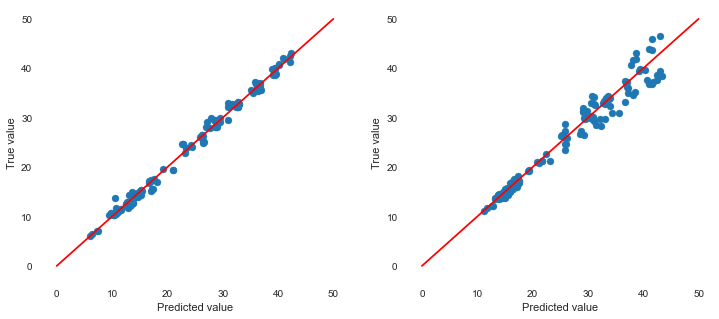

In [64]:
# So sánh Predicted value và True value
plt.figure(figsize=(12,5))
n=0
for i in lst_output:
    n=n+1
    plt.subplot(1,2,n)
    plt.scatter(yhat_pf_test[:,n-1], y_pf_test[i])
    plt.xlabel('Predicted value')
    plt.ylabel('True value')
    plt.plot([0,50], [0,50], 'k-', color='r')

plt.show()

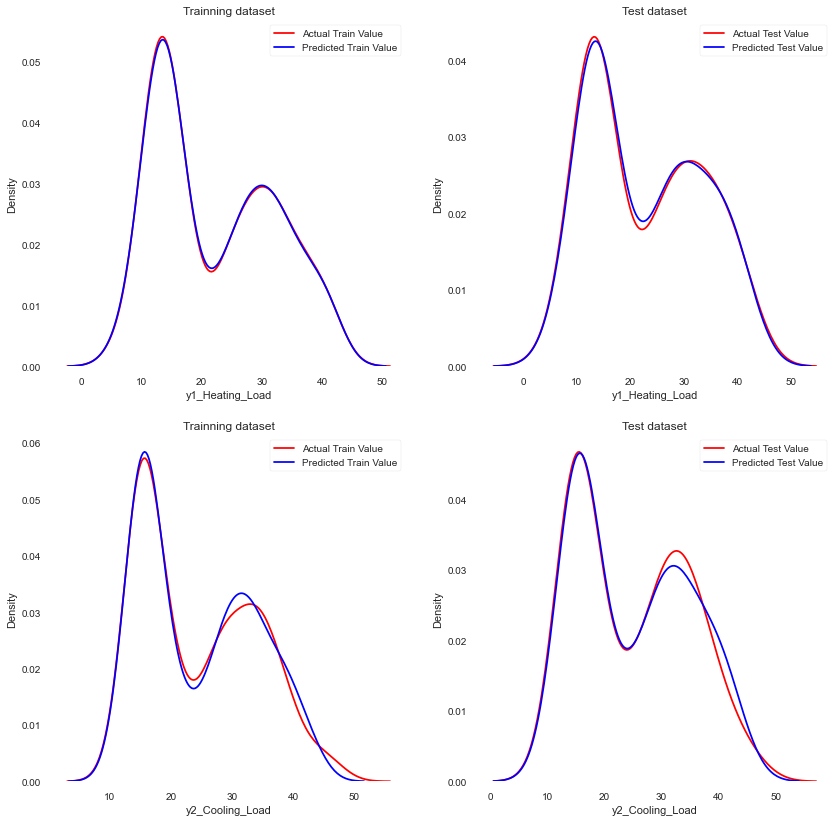

In [65]:
# So sánh biểu đồ phân phối tần suất
plt.figure(figsize=(14,14))
n=0
for i in lst_output:
    n=n+1
    m=lst_output.index(i)
    plt.subplot(2,2,n)
    sns.kdeplot(y_pf_train[i], color='r', label='Actual Train Value')
    sns.kdeplot(yhat_pf_train[:,m],  color='b', label='Predicted Train Value')
    plt.legend()
    plt.title('Trainning dataset')
    n=n+1
    plt.subplot(2,2,n)
    sns.kdeplot(y_pf_test[i],  color='r', label='Actual Test Value')
    sns.kdeplot(yhat_pf_test[:,m],  color='b', label='Predicted Test Value')
    plt.title('Test dataset')
    plt.legend()

plt.show()

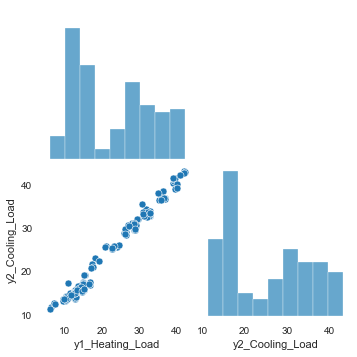

In [66]:
df_yhat_pf_test = pd.DataFrame(yhat_pf_test, columns=df[lst_output].columns)
sns.pairplot(df_yhat_pf_test, corner=True)

<span style="color:red">
Nhận xét: Mô hình MPL có hiệu suất tốt hơn nhiều mô hình MR --> Chọn mô hình MPL
</span>

# DỰ ĐOÁN (từng output): y1_Heating_Load

## CHUẨN HOÁ DỮ LIỆU (DATA STANDARDIZING)

In [67]:
# Xem lại các chỉ số mô tả thuộc tính input phân loại
print(df1[lst_phanloai_chosen1].describe())
for i in range(len(lst_phanloai_chosen1)):
    print("\nGiá trị thống kê của", lst_phanloai_chosen1[i],":\n",stats.describe(df1[lst_phanloai_chosen1[i]]))

       X1_Relative_Compactness  X2_Surface_Area  X3_Wall_Area  X4_Roof_Area  \
count               736.000000       736.000000    736.000000    736.000000   
mean                  0.765353       670.487772    318.566576    175.960598   
std                   0.104630        87.312905     43.789598     44.977413   
min                   0.620000       514.500000    245.000000    110.250000   
25%                   0.690000       588.000000    294.000000    140.875000   
50%                   0.760000       661.500000    318.500000    147.000000   
75%                   0.860000       735.000000    343.000000    220.500000   
max                   0.980000       808.500000    416.500000    220.500000   

       X5_Overall_Height  X7_Glazing_Area  X8_Glazing_Area_Distribution  
count         736.000000       736.000000                    736.000000  
mean            5.283288         0.236413                      2.857337  
std             1.750873         0.131987                      1.5

#### Nhận xét:
* Các biến ' X2_Surface_Area', 'X3_Wall_Area', 'X4_Roof_Area' có phương sai lớn so với các biến còn lại

### Chuẩn hoá bằng Log Normalization

In [68]:
lst_phanloai_chosen1_log = ['X1_Relative_Compactness', 'X5_Overall_Height', 'X7_Glazing_Area', 'X8_Glazing_Area_Distribution']
for i in lst_phanloai_chosen1:
    if i in lst_phanloai_chosen1_log: pass
    else:
        name_log = i + '_log'
        lst_phanloai_chosen1_log.append(name_log)
        df1[name_log] = np.log(df1[i])
    
df1[lst_phanloai_chosen1_log].head()

# df['X2_log'] = np.log(df['X2'])
# df['X3_log'] = np.log(df['X3'])
# df['X4_log'] = np.log(df['X4'])

X1_Relative_Compactness  X5_Overall_Height  X7_Glazing_Area  \
0                     0.98                7.0              0.0   
1                     0.90                7.0              0.0   
2                     0.90                7.0              0.0   
3                     0.90                7.0              0.0   
4                     0.90                7.0              0.0   

   X8_Glazing_Area_Distribution  X2_Surface_Area_log  X3_Wall_Area_log  \
0                             0             6.243196          5.683580   
1                             0             6.334167          5.763622   
2                             0             6.334167          5.763622   
3                             0             6.334167          5.763622   
4                             0             6.334167          5.763622   

   X4_Roof_Area_log  
0          4.702751  
1          4.808111  
2          4.808111  
3          4.808111  
4          4.808111

## FEATURE ENGINEEING

In [69]:
# Xem lại các thuộc tính phân loại
for i in lst_phanloai_chosen1_log:
    print(i,df1[i].sort_values().unique())

X1_Relative_Compactness [0.62 0.64 0.66 0.69 0.71 0.74 0.76 0.79 0.82 0.86 0.9  0.98]
X5_Overall_Height [3.5 7. ]
X7_Glazing_Area [0.   0.1  0.25 0.4 ]
X8_Glazing_Area_Distribution [0 1 2 3 4 5]
X2_Surface_Area_log [6.24319556 6.33416733 6.37672695 6.41754894 6.45676966 6.49450998
 6.53087763 6.56596895 6.5998705  6.63266032 6.66440902 6.69518068]
X3_Wall_Area_log [5.50125821 5.59656839 5.68357977 5.76362248 5.83773045 5.90672332
 6.03188646]
X4_Roof_Area_log [4.70275051 4.80811103 4.99043259 5.39589769]


#### Nhận xét:
* Các thuộc tính phân loại được chọn đều là kiểu số
* Không cần thực hiện Feature Engineering

## CHIA DỮ LIỆU (DATA SPLITTING)

In [70]:
X1 = df1[lst_phanloai_chosen1_log]
X1.head()

X1_Relative_Compactness  X5_Overall_Height  X7_Glazing_Area  \
0                     0.98                7.0              0.0   
1                     0.90                7.0              0.0   
2                     0.90                7.0              0.0   
3                     0.90                7.0              0.0   
4                     0.90                7.0              0.0   

   X8_Glazing_Area_Distribution  X2_Surface_Area_log  X3_Wall_Area_log  \
0                             0             6.243196          5.683580   
1                             0             6.334167          5.763622   
2                             0             6.334167          5.763622   
3                             0             6.334167          5.763622   
4                             0             6.334167          5.763622   

   X4_Roof_Area_log  
0          4.702751  
1          4.808111  
2          4.808111  
3          4.808111  
4          4.808111

In [71]:
y1 = df1[lst_output[0]]
y1[0:5]

0    15.55
1    20.84
2    21.46
3    20.71
4    19.68
Name: y1_Heating_Load, dtype: float64

In [72]:
# Chia dữ liệu thành Training set và Test set

In [73]:
## import thư viện
from sklearn.model_selection import train_test_split

In [74]:
## Chia dữ liệu (Data splitting)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0,
                                                   test_size=0.2)

In [75]:
X1.shape, X1_train.shape, X1_test.shape

((736, 7), (588, 7), (148, 7))

In [76]:
y1.shape, y1_train.shape, y1_test.shape

((736,), (588,), (148,))

## MULTIPLE LINEAR REGRESSION (MR): y1_Heating_Load

In [77]:
# import thư viện
from sklearn.linear_model import LinearRegression

In [78]:
# khởi tạo model
model1 = LinearRegression()

In [79]:
# huấn luyện model với dữ liệu train
model1.fit(X1_train, y1_train)

LinearRegression()

In [80]:
yhat1_train = model1.predict(X1_train)

In [81]:
yhat1_test = model1.predict(X1_test)

In [82]:
# tính R^2
print('Full Dataset R-square: ', model1.score(X1, y1))
print('Train Dataset R-square: ', model1.score(X1_train, y1_train))
print('Test Dataset R-square: ', model1.score(X1_test, y1_test))

Full Dataset R-square:  0.9203745913908741
Train Dataset R-square:  0.9218522309759611
Test Dataset R-square:  0.913164644434586


### Nhận xét:
* Hệ số R-squared đều > 90% --> Model có hiệu suất tượng đối cao

In [83]:
# tính MSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [84]:
print('Train Dataset MSE: ', mean_squared_error(y_true=y1_train, y_pred=yhat1_train))
print('Test Dataset MSE: ', mean_squared_error(y_true=y1_test, y_pred=yhat1_test))

Train Dataset MSE:  8.06284298180906
Test Dataset MSE:  8.575950599004504


In [85]:
print('Train Dataset MAE: ', mean_absolute_error(y_true=y1_train, y_pred=yhat1_train))
print('Test Dataset MAE: ', mean_absolute_error(y_true=y1_test, y_pred=yhat1_test))

Train Dataset MAE:  2.089783687187896
Test Dataset MAE:  2.1019953618065603


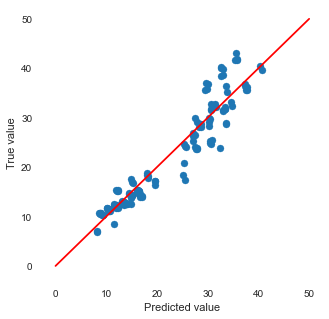

In [86]:
# So sánh Predicted value và True value
plt.figure(figsize=(5,5))
plt.scatter(yhat1_test, y1_test)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.plot([0,50], [0,50], 'k-', color='r')
plt.show()

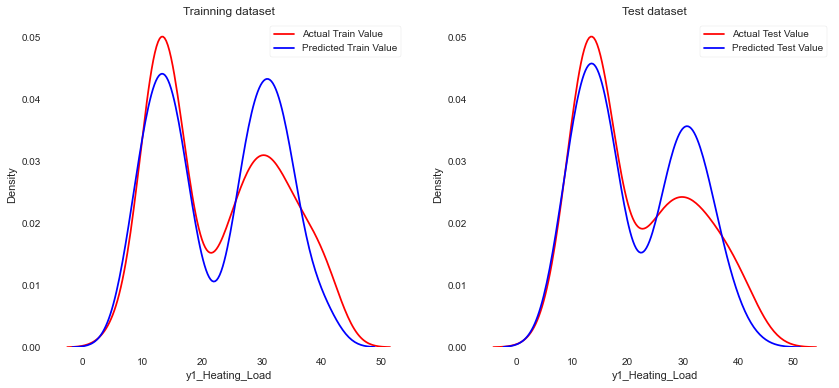

In [87]:
# So sánh biểu đồ phân phối tần suất
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.kdeplot(y1_train, color='r', label='Actual Train Value')
sns.kdeplot(yhat1_train,  color='b', label='Predicted Train Value')
plt.legend()
plt.title('Trainning dataset')

plt.subplot(1,2,2)
sns.kdeplot(y1_test,  color='r', label='Actual Test Value')
sns.kdeplot(yhat1_test,  color='b', label='Predicted Test Value')
plt.title('Test dataset')
plt.legend()

plt.show()

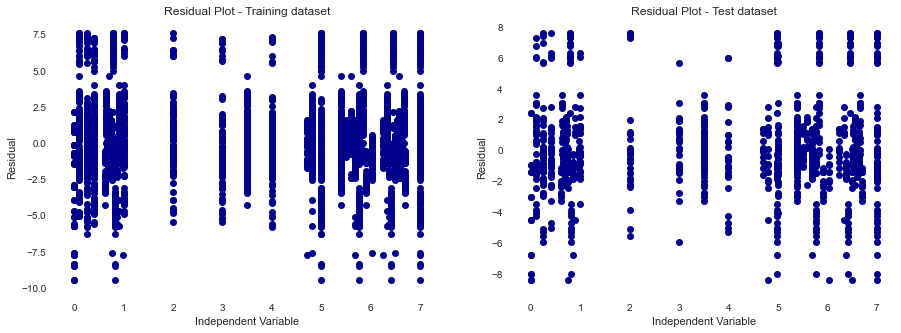

In [88]:
# Kiểm tra mức độ ngẫu nhiên của phần dư
residuals_train = y1_train-yhat1_train
residuals_test = y1_test-yhat1_test

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(X1_train, residuals_train, 'o', color='darkblue')
plt.title("Residual Plot - Training dataset")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

plt.subplot(1,2,2)
plt.plot(X1_test, residuals_test, 'o', color='darkblue')
plt.title("Residual Plot - Test dataset")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

plt.show()

## MULTIPLE POLINORMINAL REGRESSION (MPL): y1_Heating_Load

In [89]:
# tạo đa thức bậc 2
pf1 = PolynomialFeatures(degree=2)

In [90]:
X1_pf = pf1.fit_transform(X1)

In [91]:
X1.shape, X1_pf.shape

((736, 7), (736, 36))

In [92]:
X1_pf_train, X1_pf_test, y1_pf_train, y1_pf_test = train_test_split(X1_pf, y1, random_state=0,
                                                   test_size=0.2)

In [93]:
# khoi tao model
model1_pf = LinearRegression()

In [94]:
# huan luyen model
model1_pf.fit(X1_pf_train, y1_pf_train)

LinearRegression()

In [95]:
yhat1_pf_train = model1_pf.predict(X1_pf_train)

In [96]:
yhat1_pf_test = model1_pf.predict(X1_pf_test)

In [97]:
# tinh R^2
print('Full Dataset R-square: ', model1_pf.score(X1_pf, y1))
print('Train Dataset R-square: ', model1_pf.score(X1_pf_train, y1_pf_train))
print('Test Dataset R-square: ', model1_pf.score(X1_pf_test,y1_pf_test))

Full Dataset R-square:  0.9951330617935804
Train Dataset R-square:  0.9952956668907141
Test Dataset R-square:  0.9943923403925091


In [98]:
# tinh MSE, MAE
print('Train Dataset MSE: ', mean_squared_error(y_true=y1_pf_train, y_pred=yhat1_pf_train))
print('Test Dataset MSE: ', mean_squared_error(y_true=y1_pf_test, y_pred=yhat1_pf_test))

Train Dataset MSE:  0.4853663728087984
Test Dataset MSE:  0.5538183319079917


In [99]:
print('Train Dataset MAE: ', mean_absolute_error(y_true=y1_pf_train, y_pred=yhat1_pf_train))
print('Test Dataset MAE: ', mean_absolute_error(y_true=y1_pf_test, y_pred=yhat1_pf_test))

Train Dataset MAE:  0.5247119032671662
Test Dataset MAE:  0.5422284100506758


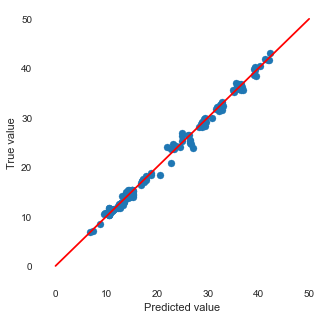

In [100]:
# truc quan hoa ket qua
plt.figure(figsize=(5,5))
plt.scatter(yhat1_pf_test, y1_pf_test)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.plot([0,50], [0,50], 'k-', color='r')
plt.show()

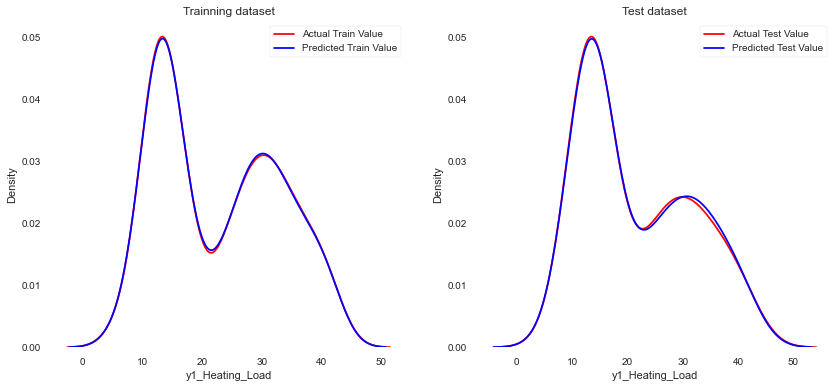

In [101]:
# So sánh biểu đồ phân phối tần suất
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.kdeplot(y1_pf_train, color='r', label='Actual Train Value')
sns.kdeplot(yhat1_pf_train,  color='b', label='Predicted Train Value')
plt.legend()
plt.title('Trainning dataset')

plt.subplot(1,2,2)
sns.kdeplot(y1_pf_test,  color='r', label='Actual Test Value')
sns.kdeplot(yhat1_pf_test,  color='b', label='Predicted Test Value')
plt.title('Test dataset')
plt.legend()

plt.show()

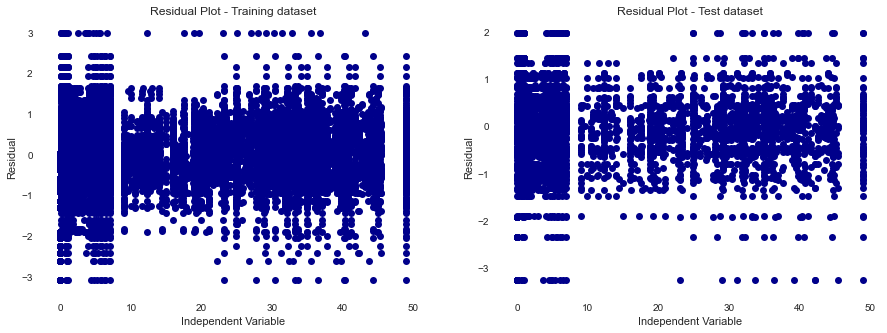

In [102]:
# Kiểm tra mức độ ngẫu nhiên của phần dư
residuals_pf_train = y1_pf_train-yhat1_pf_train
residuals_pf_test = y1_pf_test-yhat1_pf_test

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(X1_pf_train, residuals_pf_train, 'o', color='darkblue')
plt.title("Residual Plot - Training dataset")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

plt.subplot(1,2,2)
plt.plot(X1_pf_test, residuals_pf_test, 'o', color='darkblue')
plt.title("Residual Plot - Test dataset")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

plt.show()

<span style="color:red">
Nhận xét: Nếu dự đoán riêng output y1_Heating_Load thì mô hình MPL có hiệu suất tốt hơn nhiều mô hình MR --> Chọn mô hình MPL
</span>

# DỰ ĐOÁN (từng output): y2_Cooling_Load

## CHUẨN HOÁ DỮ LIỆU (DATA STANDARDIZING)

In [103]:
# Xem lại các chỉ số mô tả thuộc tính input phân loại
print(df2[lst_phanloai_chosen2].describe())
for i in range(len(lst_phanloai_chosen2)):
    print("\nGiá trị thống kê của", lst_phanloai_chosen2[i],":\n",stats.describe(df2[lst_phanloai_chosen2[i]]))

       X1_Relative_Compactness  X2_Surface_Area  X3_Wall_Area  X4_Roof_Area  \
count               768.000000       768.000000    768.000000    768.000000   
mean                  0.764167       671.708333    318.500000    176.604167   
std                   0.105777        88.086116     43.626481     45.165950   
min                   0.620000       514.500000    245.000000    110.250000   
25%                   0.682500       606.375000    294.000000    140.875000   
50%                   0.750000       673.750000    318.500000    183.750000   
75%                   0.830000       741.125000    343.000000    220.500000   
max                   0.980000       808.500000    416.500000    220.500000   

       X5_Overall_Height  X6_Orientation  X7_Glazing_Area  \
count          768.00000      768.000000       768.000000   
mean             5.25000        3.500000         0.234375   
std              1.75114        1.118763         0.133221   
min              3.50000        2.000000    

### Chuẩn hoá bằng Log Normalization

In [104]:
lst_phanloai_chosen2_log = ['X1_Relative_Compactness', 'X5_Overall_Height', 'X6_Orientation',
                            'X7_Glazing_Area', 'X8_Glazing_Area_Distribution']
for i in lst_phanloai_chosen2:
    if i in lst_phanloai_chosen2_log: pass
    else:
        name_log = i + '_log'
        lst_phanloai_chosen2_log.append(name_log)
        df2[name_log] = np.log(df2[i])
    
df2[lst_phanloai_chosen2_log].head()

X1_Relative_Compactness  X5_Overall_Height  X6_Orientation  \
0                     0.98                7.0               2   
1                     0.98                7.0               3   
2                     0.98                7.0               4   
3                     0.98                7.0               5   
4                     0.90                7.0               2   

   X7_Glazing_Area  X8_Glazing_Area_Distribution  X2_Surface_Area_log  \
0              0.0                             0             6.243196   
1              0.0                             0             6.243196   
2              0.0                             0             6.243196   
3              0.0                             0             6.243196   
4              0.0                             0             6.334167   

   X3_Wall_Area_log  X4_Roof_Area_log  
0          5.683580          4.702751  
1          5.683580          4.702751  
2          5.683580          4.702751  
3          5.683580          4.702751  
4          5.763622          4.808111

## FEATURE ENGINEEING

In [105]:
for i in lst_phanloai_chosen2_log:
    print(i,df2[i].sort_values().unique())

X1_Relative_Compactness [0.62 0.64 0.66 0.69 0.71 0.74 0.76 0.79 0.82 0.86 0.9  0.98]
X5_Overall_Height [3.5 7. ]
X6_Orientation [2 3 4 5]
X7_Glazing_Area [0.   0.1  0.25 0.4 ]
X8_Glazing_Area_Distribution [0 1 2 3 4 5]
X2_Surface_Area_log [6.24319556 6.33416733 6.37672695 6.41754894 6.45676966 6.49450998
 6.53087763 6.56596895 6.5998705  6.63266032 6.66440902 6.69518068]
X3_Wall_Area_log [5.50125821 5.59656839 5.68357977 5.76362248 5.83773045 5.90672332
 6.03188646]
X4_Roof_Area_log [4.70275051 4.80811103 4.99043259 5.39589769]


### Nhận xét:
* Các thuộc tính phân loại được chọn đều là kiểu số
* Không cần thực hiện Feature Engineering

## CHIA DỮ LIỆU (DATA SPLITTING)

In [106]:
X2 = df2[lst_phanloai_chosen2_log]
X2.head()

X1_Relative_Compactness  X5_Overall_Height  X6_Orientation  \
0                     0.98                7.0               2   
1                     0.98                7.0               3   
2                     0.98                7.0               4   
3                     0.98                7.0               5   
4                     0.90                7.0               2   

   X7_Glazing_Area  X8_Glazing_Area_Distribution  X2_Surface_Area_log  \
0              0.0                             0             6.243196   
1              0.0                             0             6.243196   
2              0.0                             0             6.243196   
3              0.0                             0             6.243196   
4              0.0                             0             6.334167   

   X3_Wall_Area_log  X4_Roof_Area_log  
0          5.683580          4.702751  
1          5.683580          4.702751  
2          5.683580          4.702751  
3          5.683580          4.702751  
4          5.763622          4.808111

In [107]:
y2 = df2[lst_output[1]]
y2[0:5]

0    21.33
1    21.33
2    21.33
3    21.33
4    28.28
Name: y2_Cooling_Load, dtype: float64

In [108]:
# Chia dữ liệu thành Training set và Test set

In [109]:
## Chia dữ liệu (Data splitting)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0,
                                                   test_size=0.2)

In [110]:
X2.shape, X2_train.shape, X2_test.shape

((768, 8), (614, 8), (154, 8))

In [111]:
y2.shape, y2_train.shape, y2_test.shape

((768,), (614,), (154,))

## MULTIPLE LINEAR REGRESSION (MR): y2_Cooling_Load

In [112]:
# khởi tạo model
model2 = LinearRegression()

In [113]:
# huấn luyện model với dữ liệu train
model2.fit(X2_train, y2_train)

LinearRegression()

In [114]:
yhat2_train = model2.predict(X2_train)

In [115]:
yhat2_test = model2.predict(X2_test)

In [116]:
# tính R^2
print('Full Dataset R-square: ', model2.score(X2, y2))
print('Train Dataset R-square: ', model2.score(X2_train, y2_train))
print('Test Dataset R-square: ', model2.score(X2_test, y2_test))

Full Dataset R-square:  0.8874153959972798
Train Dataset R-square:  0.8881610235263548
Test Dataset R-square:  0.8844730939712475


Nhận xét:
* Hệ số R-squared đều > 80% --> Model có hiệu suất tượng đối cao

In [117]:
# tính MSE, MAE
print('Train Dataset MSE: ', mean_squared_error(y_true=y2_train, y_pred=yhat2_train))
print('Test Dataset MSE: ', mean_squared_error(y_true=y2_test, y_pred=yhat2_test))

Train Dataset MSE:  10.002919418626348
Test Dataset MSE:  10.86595098765908


In [118]:
print('Train Dataset MAE: ', mean_absolute_error(y_true=y2_train, y_pred=yhat2_train))
print('Test Dataset MAE: ', mean_absolute_error(y_true=y2_test, y_pred=yhat2_test))

Train Dataset MAE:  2.2338046530055893
Test Dataset MAE:  2.2726764605292487


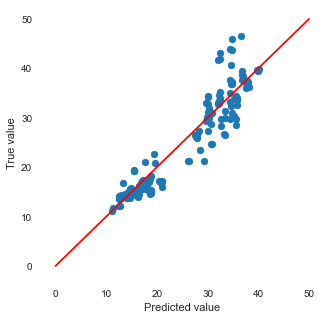

In [119]:
# So sánh Predicted value và True value
plt.figure(figsize=(5,5))
plt.scatter(yhat2_test, y2_test)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.plot([0,50], [0,50], 'k-', color='r')
plt.show()

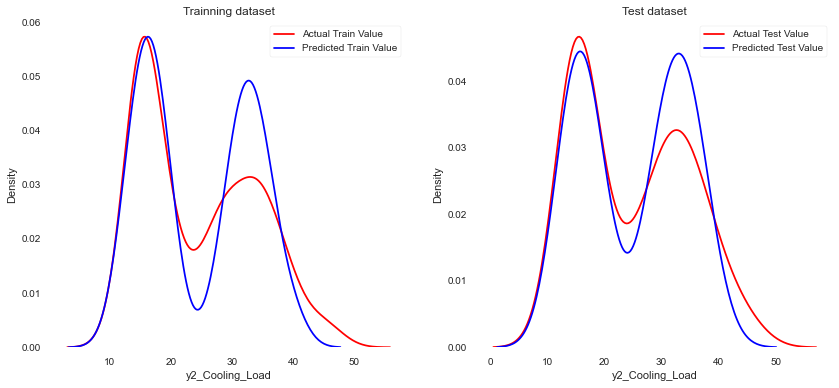

In [120]:
# So sánh biểu đồ phân phối tần suất
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.kdeplot(y2_train, color='r', label='Actual Train Value')
sns.kdeplot(yhat2_train,  color='b', label='Predicted Train Value')
plt.legend()
plt.title('Trainning dataset')

plt.subplot(1,2,2)
sns.kdeplot(y2_test,  color='r', label='Actual Test Value')
sns.kdeplot(yhat2_test,  color='b', label='Predicted Test Value')
plt.title('Test dataset')
plt.legend()

plt.show()

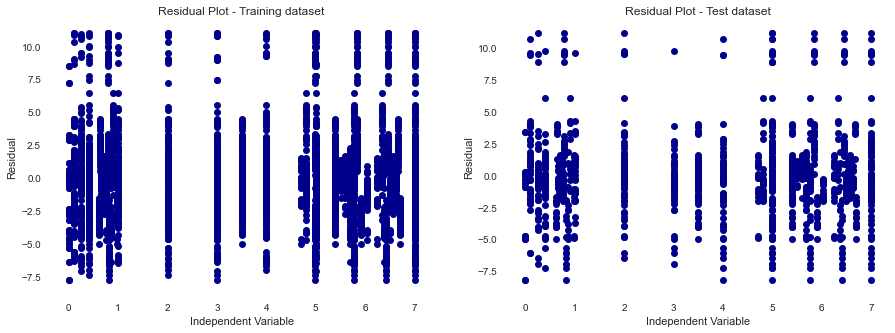

In [121]:
# Kiểm tra mức độ ngẫu nhiên của phần dư
residuals_train = y2_train-yhat2_train
residuals_test = y2_test-yhat2_test

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(X2_train, residuals_train, 'o', color='darkblue')
plt.title("Residual Plot - Training dataset")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

plt.subplot(1,2,2)
plt.plot(X2_test, residuals_test, 'o', color='darkblue')
plt.title("Residual Plot - Test dataset")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

plt.show()

## MULTIPLE POLINORMINAL REGRESSION (MPL): y2_Cooling_Load

In [122]:
# tạo đa thức bậc 2
pf2 = PolynomialFeatures(degree=2)

In [123]:
X2_pf = pf2.fit_transform(X2)
X2.shape, X2_pf.shape

((768, 8), (768, 45))

In [124]:
X2_pf_train, X2_pf_test, y2_pf_train, y2_pf_test = train_test_split(X2_pf, y2, random_state=0,
                                                   test_size=0.2)

In [125]:
# khoi tao model
model2_pf = LinearRegression()

In [126]:
# huan luyen model
model2_pf.fit(X2_pf_train, y2_pf_train)

LinearRegression()

In [127]:
yhat2_pf_train = model2_pf.predict(X2_pf_train)

In [128]:
yhat2_pf_test = model2_pf.predict(X2_pf_test)

In [129]:
# tinh R^2
print('Full Dataset R-square: ', model2_pf.score(X2_pf, y2))
print('Train Dataset R-square: ', model2_pf.score(X2_pf_train, y2_pf_train))
print('Test Dataset R-square: ', model2_pf.score(X2_pf_test,y2_pf_test))

Full Dataset R-square:  0.9718855676563906
Train Dataset R-square:  0.9732666406126993
Test Dataset R-square:  0.9666206054168335


In [130]:
# tinh MSE, MAE
print('Train Dataset MSE: ', mean_squared_error(y_true=y2_pf_train, y_pred=yhat2_pf_train))
print('Test Dataset MSE: ', mean_squared_error(y_true=y2_pf_test, y_pred=yhat2_pf_test))

Train Dataset MSE:  2.3910415507366753
Test Dataset MSE:  3.1395185589766545


In [131]:
print('Train Dataset MAE: ', mean_absolute_error(y_true=y2_pf_train, y_pred=yhat2_pf_train))
print('Test Dataset MAE: ', mean_absolute_error(y_true=y2_pf_test, y_pred=yhat2_pf_test))

Train Dataset MAE:  1.0345779607816317
Test Dataset MAE:  1.1933970582640019


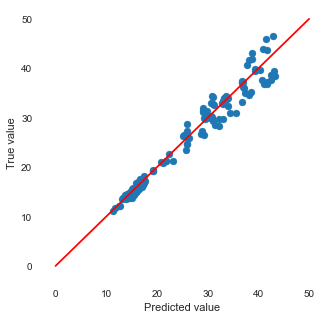

In [132]:
# truc quan hoa ket qua
plt.figure(figsize=(5,5))
plt.scatter(yhat2_pf_test, y2_pf_test)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.plot([0,50], [0,50], 'k-', color='r')
plt.show()


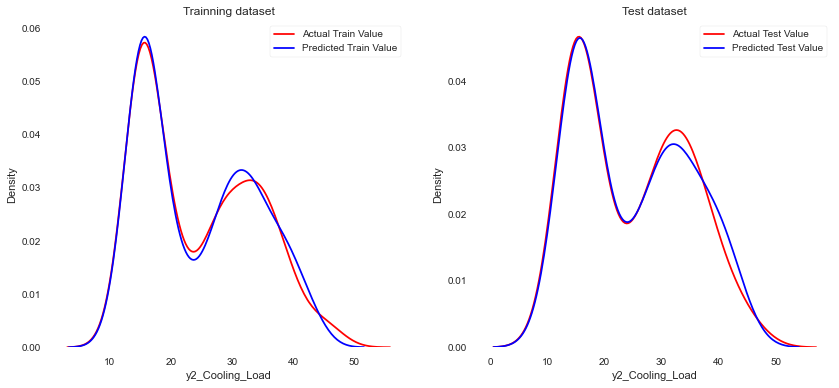

In [133]:
# So sánh biểu đồ phân phối tần suất
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.kdeplot(y2_pf_train, color='r', label='Actual Train Value')
sns.kdeplot(yhat2_pf_train,  color='b', label='Predicted Train Value')
plt.legend()
plt.title('Trainning dataset')

plt.subplot(1,2,2)
sns.kdeplot(y2_pf_test,  color='r', label='Actual Test Value')
sns.kdeplot(yhat2_pf_test,  color='b', label='Predicted Test Value')
plt.title('Test dataset')
plt.legend()

plt.show()


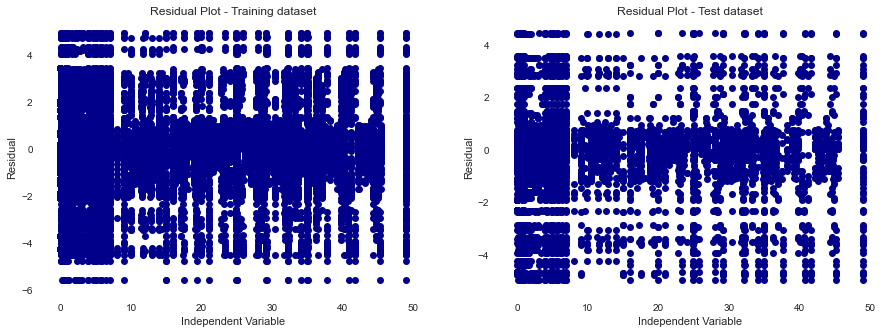

In [134]:
# Kiểm tra mức độ ngẫu nhiên của phần dư
residuals_pf_train = y2_pf_train-yhat2_pf_train
residuals_pf_test = y2_pf_test-yhat2_pf_test

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(X2_pf_train, residuals_pf_train, 'o', color='darkblue')
plt.title("Residual Plot - Training dataset")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

plt.subplot(1,2,2)
plt.plot(X2_pf_test, residuals_pf_test, 'o', color='darkblue')
plt.title("Residual Plot - Test dataset")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

plt.show()


<span style="color:red">
Nhận xét: Nếu dự đoán riêng output y2_Cooling_Load thì mô hình MPL có hiệu suất tốt hơn nhiều mô hình MR --> Chọn mô hình MPL
